In [159]:
from rich import print
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
import os
import glob

In [160]:
out_dir = os.path.join("/home/mohan/git/current_projects/contextual_rl/attention/CARL/",
                       "experiments/context_importance/",
                       "outputs/2022-07-05/22-06-44/"
                      )

In [161]:
eval_data_fps= glob.glob(os.path.join(out_dir, "**", "eval_data/*.npz"), recursive=True)
eval_data_list = [np.load(fp, allow_pickle=True).item() for fp in eval_data_fps]

In [162]:
len(eval_data_list)

127

In [163]:
DEFAULT_CONTEXT = {
    "max_speed": 8.0,
    "dt": 0.05,
    "g": 10.0,
    "m": 1.0,
    "l": 1.0,

    "initial_angle_max": np.pi, 
    "initial_velocity_max": 1,  
}

context_list = np.array([D["train_context"] for D in eval_data_list])

context_args = []

for i in range(len(context_list)):
    temp  = []
    for key in context_list[i][20]:
        if context_list[i][20][key] != DEFAULT_CONTEXT[key]:
            temp.append(key)

    context_args.append(temp)
    
    
context_args

[['max_speed', 'initial_angle_max'],
 ['max_speed', 'g', 'm', 'l', 'initial_velocity_max'],
 ['max_speed', 'm', 'initial_angle_max', 'initial_velocity_max'],
 ['dt', 'g', 'm', 'l', 'initial_velocity_max'],
 ['max_speed', 'initial_velocity_max'],
 ['dt', 'm', 'initial_velocity_max'],
 ['max_speed', 'dt', 'l', 'initial_velocity_max'],
 ['max_speed',
  'dt',
  'g',
  'm',
  'l',
  'initial_angle_max',
  'initial_velocity_max'],
 ['g'],
 ['dt', 'g', 'm', 'initial_velocity_max'],
 ['max_speed', 'dt', 'g', 'm', 'l', 'initial_angle_max'],
 ['dt', 'm', 'l', 'initial_angle_max'],
 ['dt', 'initial_velocity_max'],
 ['max_speed', 'g', 'm', 'l'],
 ['max_speed', 'dt', 'initial_angle_max', 'initial_velocity_max'],
 ['max_speed', 'l', 'initial_velocity_max'],
 ['g', 'm', 'l', 'initial_velocity_max'],
 ['g', 'initial_velocity_max'],
 ['max_speed', 'dt', 'g', 'l', 'initial_angle_max'],
 ['max_speed', 'g', 'm'],
 ['dt', 'm', 'initial_angle_max', 'initial_velocity_max'],
 ['max_speed', 'g', 'l', 'initial_

In [164]:
len(context_args)

127

In [165]:
reward_list = np.array([D["returns"] for D in eval_data_list])

len(reward_list)

127

In [166]:
fp = {key: [] for key in DEFAULT_CONTEXT}

log_points = np.arange(150, 1050, 50) * -1

for i in range(len(log_points)):
    temp = {key: 0 for key in DEFAULT_CONTEXT}
    
    for args in [ context_args[i] for i in np.where(reward_list  > log_points[i])[0]  ]:
        for context in args:
            temp[context] +=1

    for key in temp:
        fp[key].append(temp[key])

Text(0, 0.5, 'Frequency in sampled context args')

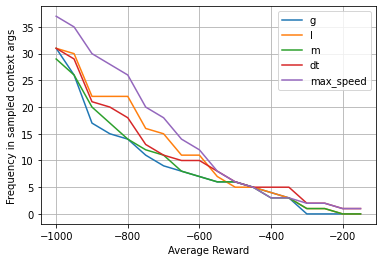

In [167]:


plt.grid()

for key in ['g', 'l', 'm', 'dt', 'max_speed']:
    plt.plot(log_points, fp[key], label=key)

plt.legend()
plt.xlabel('Average Reward')
plt.ylabel('Frequency in sampled context args')

Text(0, 0.5, 'Frequency in sampled context args')

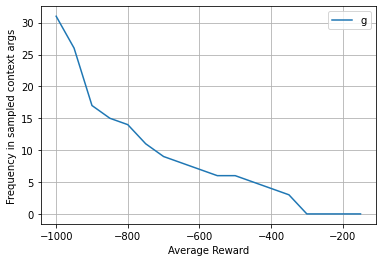

In [168]:

plt.grid()

for key in ['g',]:
    plt.plot(log_points, fp[key], label=key)

plt.legend()
plt.xlabel('Average Reward')
plt.ylabel('Frequency in sampled context args')